#  Machine Learning Project

## Part I. Exploratory data analysis (correlation analysis)

### Check the data quality first and perform data preparation tasks


In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm

#model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load and display the data
df = pd.read_csv("movie_metadata.csv")
df.head(2)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [3]:
# check column names and number of unique values
df.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [4]:
# identify categorical and convert into numerical
# create dummy variables or colummn for color
df = pd.get_dummies(df, columns=['color'])
df.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,1
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,1


In [5]:
#check data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [6]:
# check the number of missing values for each column
df.isnull().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
color_ Black and White         0
color_Color                    0
dtype: int64

In [7]:
#handling missing value: 
#remove the rows with any missing value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3757 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              3757 non-null   object 
 1   num_critic_for_reviews     3757 non-null   float64
 2   duration                   3757 non-null   float64
 3   director_facebook_likes    3757 non-null   float64
 4   actor_3_facebook_likes     3757 non-null   float64
 5   actor_2_name               3757 non-null   object 
 6   actor_1_facebook_likes     3757 non-null   float64
 7   gross                      3757 non-null   float64
 8   genres                     3757 non-null   object 
 9   actor_1_name               3757 non-null   object 
 10  movie_title                3757 non-null   object 
 11  num_voted_users            3757 non-null   int64  
 12  cast_total_facebook_likes  3757 non-null   int64  
 13  actor_3_name               3757 non-null   objec

In [8]:
# remove duplicates
mask = df.duplicated(keep=False)
print(mask)

0       False
1       False
2       False
3       False
5       False
        ...  
5026    False
5027    False
5033    False
5035    False
5042    False
Length: 3757, dtype: bool


In [9]:
# display those duplicate rows for review
df[mask]

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
17,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,0,1
63,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,...,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000,0,1
100,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,Paul Walker,...,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000,0,1
137,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,...,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000,0,1
145,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,Hugh Jackman,...,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,Kenneth Branagh,85.0,150.0,0.0,401.0,Brian Blessed,597.0,4414535.0,Drama,Julie Christie,...,UK,PG-13,18000000.0,1996.0,591.0,7.8,2.20,0,0,1
4313,Bruce McCulloch,52.0,85.0,54.0,455.0,Megan Mullally,985.0,13973532.0,Comedy|Crime,Martin Starr,...,USA,PG-13,25000000.0,2002.0,637.0,5.1,1.85,215,0,1
4565,Peter Cattaneo,122.0,91.0,11.0,121.0,Mark Addy,1000.0,45857453.0,Comedy|Drama|Music,Tom Wilkinson,...,UK,R,3500000.0,1997.0,891.0,7.2,1.85,0,0,1
4631,Danny Boyle,393.0,101.0,0.0,888.0,Spencer Wilding,3000.0,2319187.0,Crime|Drama|Mystery|Thriller,Rosario Dawson,...,UK,R,20000000.0,2013.0,1000.0,7.0,2.35,23000,0,1


In [10]:
# find out how many 
len(df[mask])

66

In [11]:
# now drop those duplicated
dfnew = df.drop_duplicates(keep="first")
dfnew.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,1
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,1


In [12]:
# remove unnecessary columns（movie_title，director_name，actor_1_name，actor_2_name，actor_3_name，plot_keywords，country,movie_imdb_link,language,content_rating,title_year, genres）
dfnew = dfnew.drop(['movie_title', 'director_name', 'actor_1_name','actor_2_name','actor_3_name','country','plot_keywords','movie_imdb_link','language','content_rating','title_year','genres'], axis=1)
dfnew.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000,0,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0,0,1


In [13]:
# a statistical summay
dfnew.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3.724000e+03,3.724000e+03,3724.000000,3724.000000,3724.000000,3.724000e+03,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000
mean,167.010741,110.261815,809.663265,764.925886,7741.517991,5.246660e+07,1.055268e+05,11492.532492,1.375671,335.813373,4.621969e+07,2009.546455,6.465575,2.110747,9297.000537,0.033029,0.966702
std,123.341991,22.675511,3076.235670,1868.597672,15556.259146,6.979899e+07,1.515540e+05,19111.284451,2.044984,411.055593,2.269216e+08,4530.602201,1.053519,0.353853,21424.318817,0.178736,0.179436
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,0.000000,1.600000,1.180000,0.000000,0.000000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,744.750000,8.118030e+06,1.957625e+04,1907.500000,0.000000,109.000000,1.000000e+07,383.750000,5.900000,1.850000,0.000000,0.000000,1.000000
50%,138.000000,106.000000,63.000000,436.000000,1000.000000,3.003931e+07,5.397350e+04,4048.000000,1.000000,209.000000,2.500000e+07,683.000000,6.600000,2.350000,225.500000,0.000000,1.000000
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.688194e+07,1.284895e+05,16231.250000,2.000000,398.000000,5.000000e+07,975.000000,7.200000,2.350000,11000.000000,0.000000,1.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,137000.000000,9.300000,16.000000,349000.000000,1.000000,1.000000


### Perform correlation analysis and discuss the results. What variables are correlated to imdb_score? How are some key variables correlated to each other?

In [14]:
# correlation analysis
dfnew.corr()['imdb_score']

num_critic_for_reviews       0.349865
duration                     0.367404
director_facebook_likes      0.193143
actor_3_facebook_likes       0.064201
actor_1_facebook_likes       0.092963
gross                        0.215559
num_voted_users              0.482608
cast_total_facebook_likes    0.105436
facenumber_in_poster        -0.066942
num_user_for_reviews         0.325067
budget                       0.029478
actor_2_facebook_likes       0.100316
imdb_score                   1.000000
aspect_ratio                 0.030995
movie_facebook_likes         0.284063
color_ Black and White       0.116874
color_Color                 -0.115898
Name: imdb_score, dtype: float64

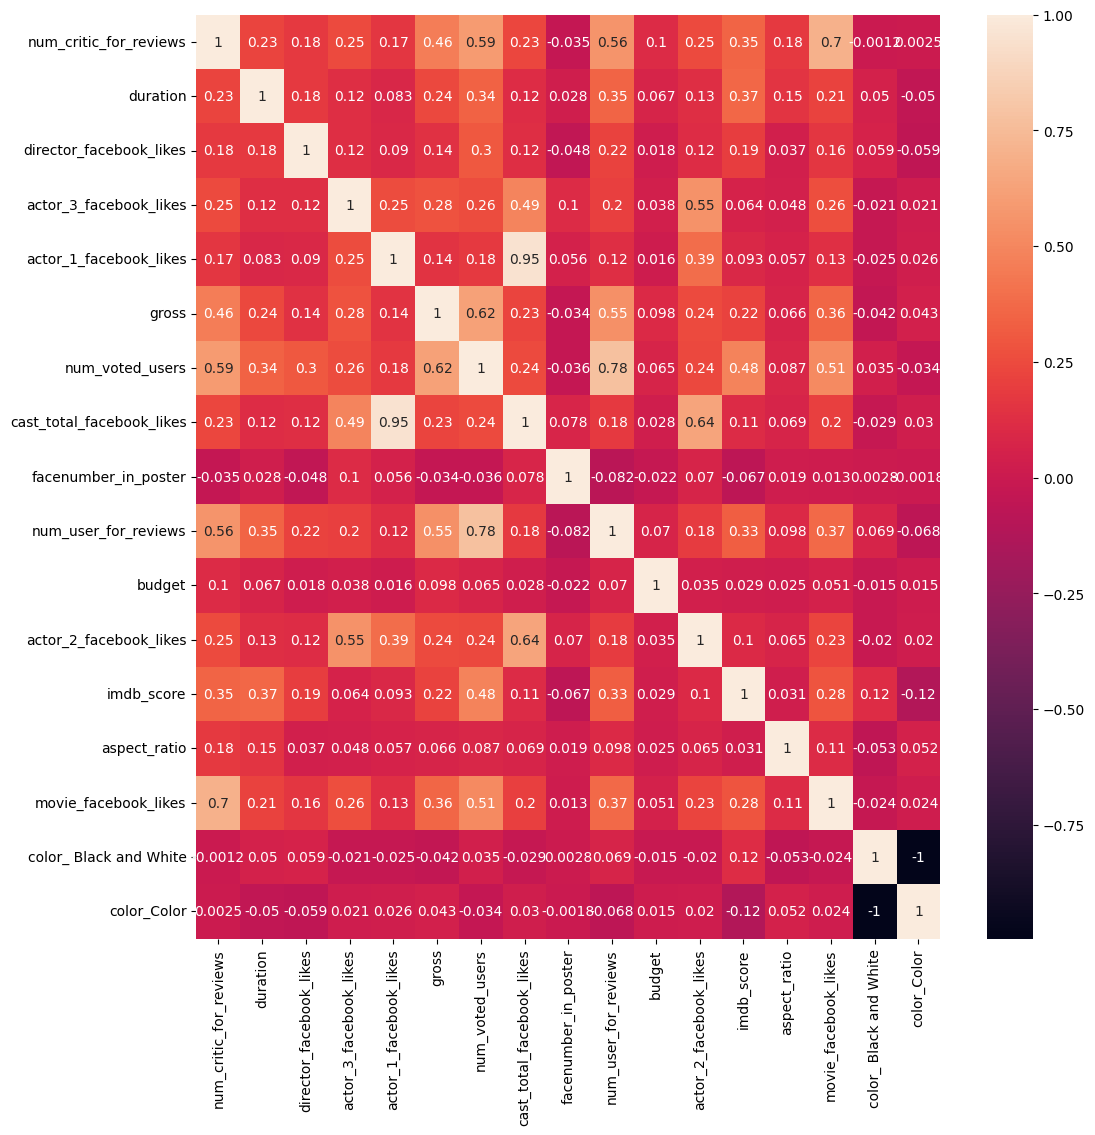

In [15]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(dfnew.corr(), annot=True);

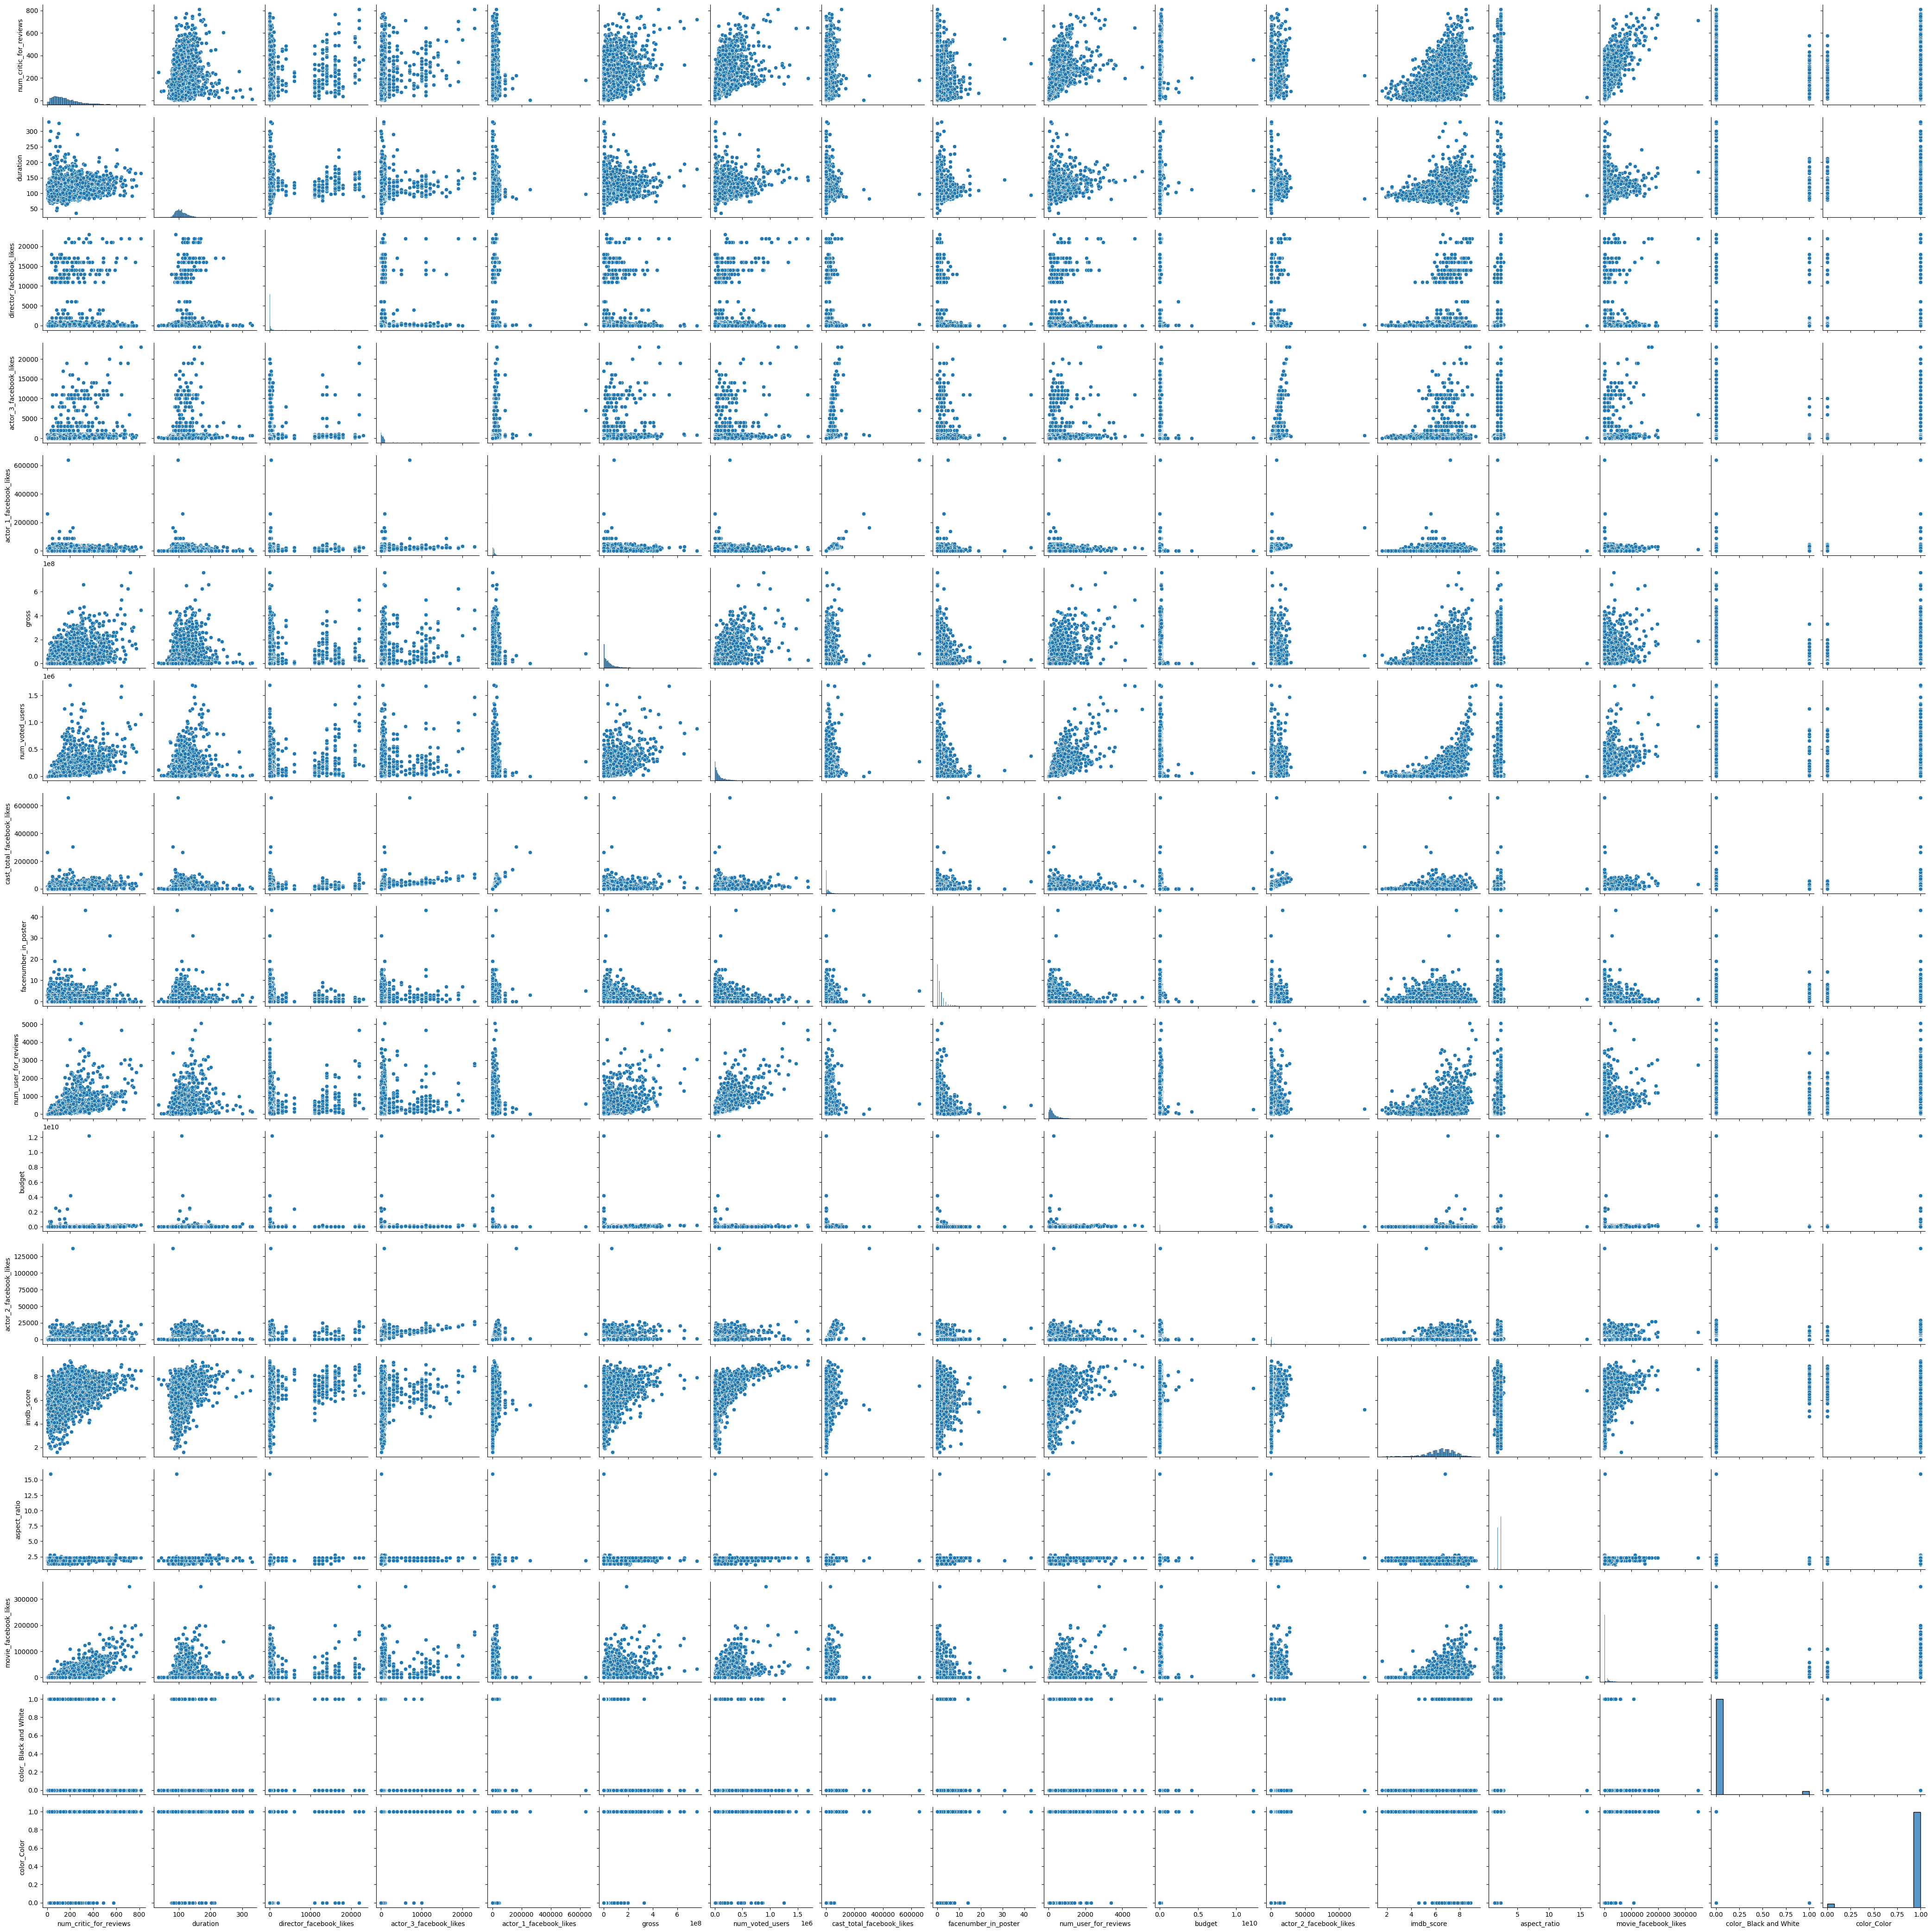

In [16]:
# correlation plot(scatter plot)
sns.pairplot(dfnew) 

<Axes: title={'center': 'Relationship between gross and imdb_score'}, xlabel='gross', ylabel='imdb_score'>

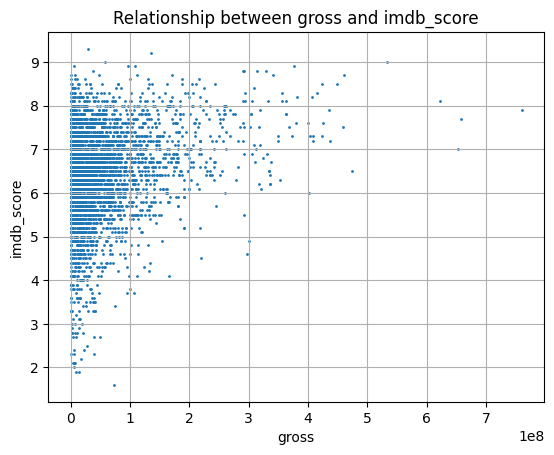

In [17]:
# scatter plot for 'gross' and 'imdb_score'
dfnew.plot(x="gross", y="imdb_score", kind="scatter", title="Relationship between gross and imdb_score", grid=True, s=1)

<Axes: title={'center': 'Relationship between num_voted_users and imdb_score'}, xlabel='num_voted_users', ylabel='imdb_score'>

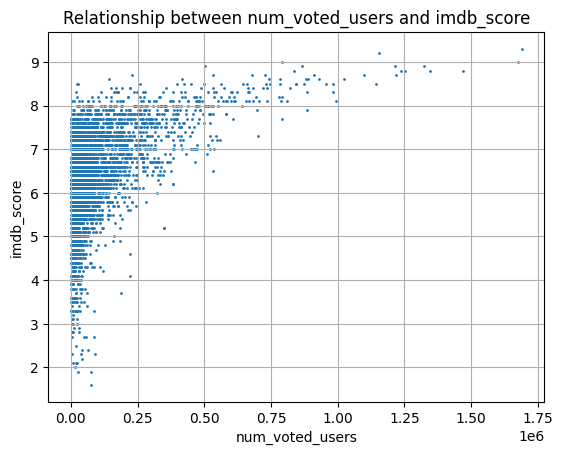

In [18]:
# scatter plot for 'num_voted_users' and 'imdb_score'
dfnew.plot(x="num_voted_users", y="imdb_score", kind="scatter", title="Relationship between num_voted_users and imdb_score", grid=True, s=1)

<Axes: title={'center': 'Relationship between movie_facebook_likes and imdb_score'}, xlabel='movie_facebook_likes', ylabel='imdb_score'>

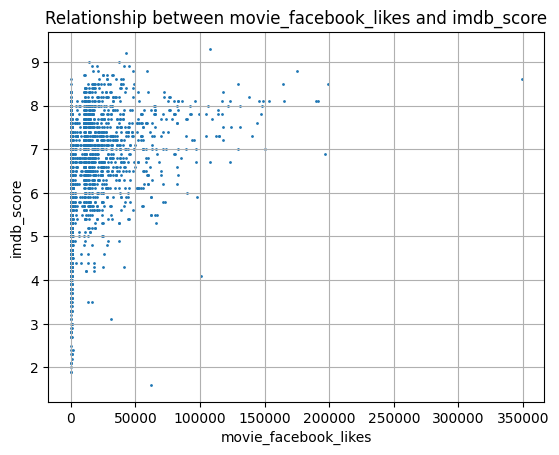

In [19]:
# scatter plot for 'movie_facebook_likes' and 'imdb_score'
dfnew.plot(x="movie_facebook_likes", y="imdb_score", kind="scatter", title="Relationship between movie_facebook_likes and imdb_score", grid=True, s=1)

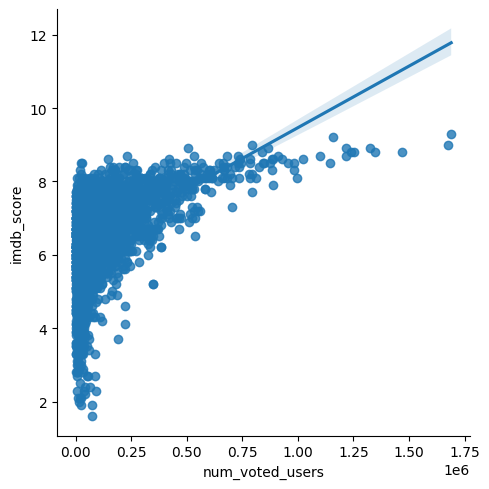

In [20]:
# lmplot for num_voted_users and imdb_score（Plot data and regression model）
sns.lmplot(x='num_voted_users', y='imdb_score', data=dfnew)

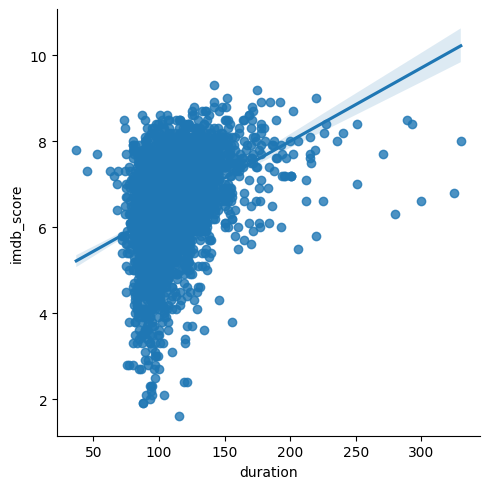

In [21]:
# lmplot for duration and imdb_score（Plot data and regression model）
sns.lmplot(x='duration', y='imdb_score', data=dfnew)

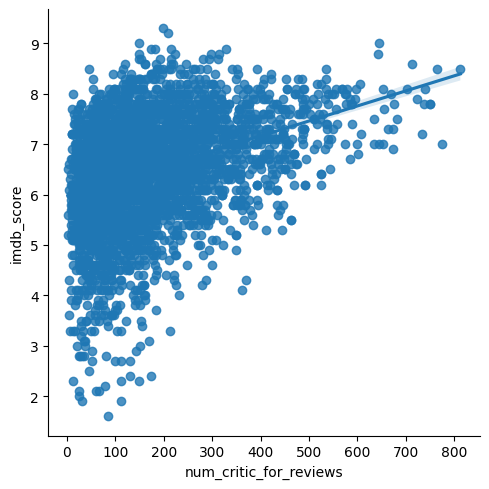

In [22]:
# lmplot for num_critic_for_reviews and imdb_score（Plot data and regression model）
sns.lmplot(x='num_critic_for_reviews', y='imdb_score', data=dfnew)

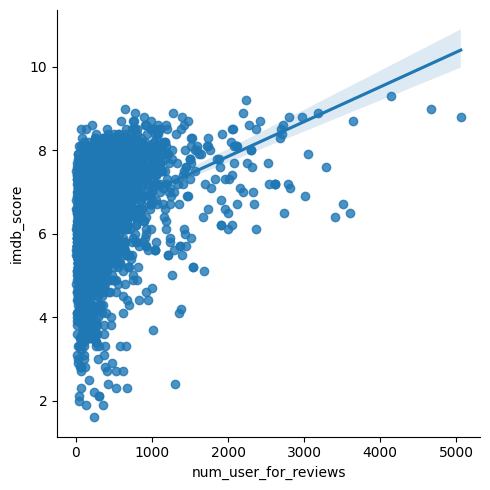

In [23]:
# lmplot for num_user_for_reviews and imdb_score（Plot data and regression model）
sns.lmplot(x='num_user_for_reviews', y='imdb_score', data=dfnew)

* ***The results of the correlation analysis***

* imdb_score has **positive correlation** with num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes, actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio ,color_black_and_white and movie_facebook_likes
* imdb_score has **high positive correlation** with ***_num_voted_users,duration,num_critic_for_reviews and num_user_for_reviews_.***
* imdb_score has **negative correlation** with ***_facenumber_in_poster and Color_color_***.

In [24]:
# check the correlation between X variables 
# drop imdb_score  column and only keep the X variables
df1=dfnew.drop('imdb_score', axis=1)
df1.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,1.78,33000,0,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,2.35,0,0,1


In [25]:
# check the correlation
df1.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
num_critic_for_reviews,1.000000,0.227659,0.175754,0.245453,0.165731,0.460890,0.591649,0.233863,-0.035434,0.562676,0.103952,0.251164,0.179615,0.703590,-0.001198,0.002541
duration,0.227659,1.000000,0.180412,0.120787,0.082931,0.242644,0.338979,0.117766,0.027570,0.352108,0.067392,0.126671,0.153292,0.213002,0.050420,-0.049810
director_facebook_likes,0.175754,0.180412,1.000000,0.120594,0.090492,0.139766,0.302789,0.120102,-0.047529,0.218907,0.018117,0.117876,0.037125,0.162664,0.059245,-0.058649
actor_3_facebook_likes,0.245453,0.120787,0.120594,1.000000,0.252462,0.281250,0.257645,0.485601,0.104876,0.200503,0.038215,0.550333,0.047885,0.259934,-0.021313,0.021481
actor_1_facebook_likes,0.165731,0.082931,0.090492,0.252462,1.000000,0.142649,0.178073,0.946078,0.055843,0.121469,0.016047,0.390433,0.056732,0.128849,-0.025039,0.025593
gross,0.460890,0.242644,0.139766,0.281250,0.142649,1.000000,0.622764,0.228025,-0.034252,0.545724,0.098345,0.244018,0.065761,0.358681,-0.042330,0.043261
num_voted_users,0.591649,0.338979,0.302789,0.257645,0.178073,0.622764,1.000000,0.243898,-0.035695,0.779221,0.065426,0.239165,0.086946,0.514889,0.035490,-0.034339
cast_total_facebook_likes,0.233863,0.117766,0.120102,0.485601,0.946078,0.228025,0.243898,1.000000,0.078328,0.176309,0.027692,0.640378,0.069371,0.200039,-0.029027,0.029623
facenumber_in_poster,-0.035434,0.027570,-0.047529,0.104876,0.055843,-0.034252,-0.035695,0.078328,1.000000,-0.082392,-0.022074,0.070313,0.019233,0.013038,0.002787,-0.001769
num_user_for_reviews,0.562676,0.352108,0.218907,0.200503,0.121469,0.545724,0.779221,0.176309,-0.082392,1.000000,0.070302,0.184751,0.098107,0.368626,0.069184,-0.067771


<Axes: >

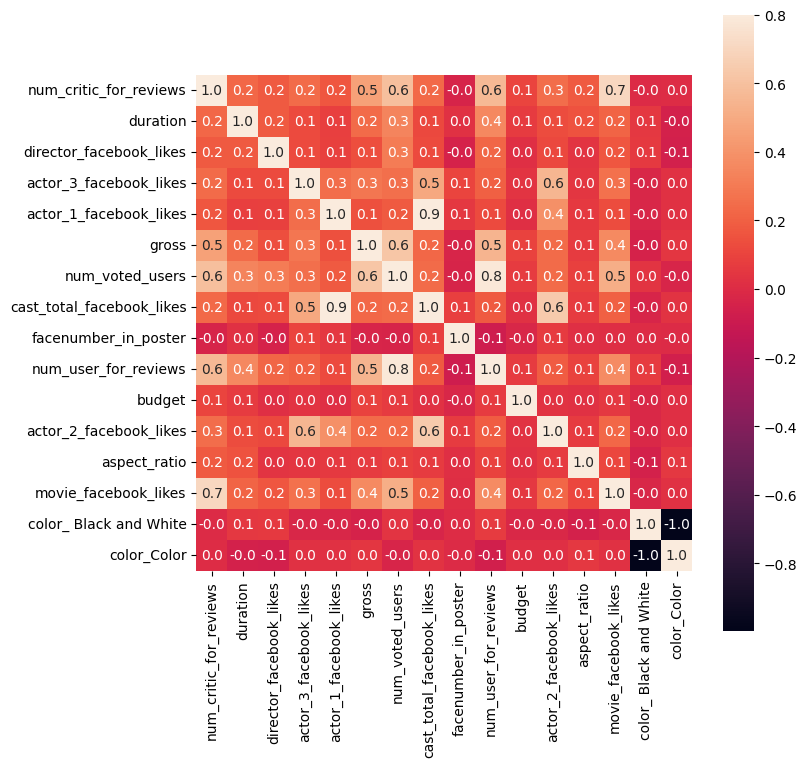

In [26]:
# correlation plot
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(), vmax=.8, square=True,annot=True, fmt=".1f")

***The results of the correlation analysis***

* **_num_critic_for_reviews_** has high positive correlation with ***_gross,num_voted_users,num_user_for_reviews and movie_facebook_likes_.***
* **_actor_3_facebook_likes_** has high positive correlation with ***_cast_total_facebook_likes,actor_2_facebook_likes_.***
* **_actor_1_facebook_likes_** has high positive correlation with ***_cast_total_facebook_likes_.***

* **_facenumber_in_poster_** has negative correlation with ***_num_critic_for_reviews_.***

## Part II. Regression

**Normalization the data**
* Apply normalizer to our data and run regresssion analysis

In [27]:
y = dfnew['imdb_score'] 
X = dfnew.drop(['imdb_score'], axis =1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2404d79df40>,
 'caps': [<matplotlib.lines.Line2D at 0x2404d7af4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2404d79dca0>,
 'medians': [<matplotlib.lines.Line2D at 0x2404d7afa00>,
 'fliers': [<matplotlib.lines.Line2D at 0x2404d7afca0>,
 'means': []}

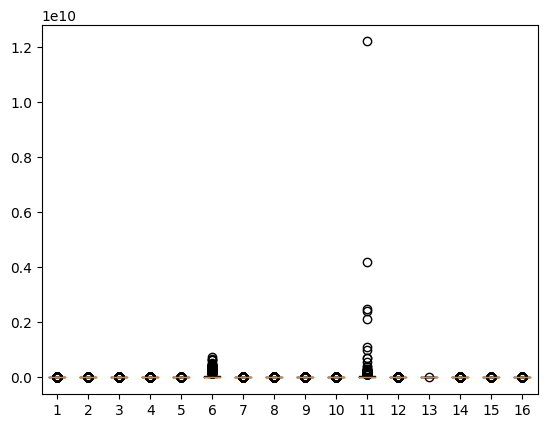

In [28]:
# data is not scaled ... some columns have wide scales
plt.boxplot(X)

In [29]:
X.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,1.78,33000,0,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,2.35,0,0,1


* **gross and budget** appear to be not good predictors for imdb_score. So let's remove them.

In [30]:
from sklearn.preprocessing import Normalizer

y =dfnew['imdb_score']  
X =dfnew.drop(['imdb_score','gross','budget'], axis =1)   # remove gross and budget

# model building
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[8.15255612e-04, 2.00713000e-04, 0.00000000e+00, ...,
        3.72108371e-02, 0.00000000e+00, 1.12760112e-06],
       [6.35242127e-04, 3.55483177e-04, 1.18424277e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.10345075e-06],
       [2.08221501e-03, 5.11906681e-04, 0.00000000e+00, ...,
        2.94000459e-01, 0.00000000e+00, 3.45882892e-06],
       ...,
       [1.90448492e-03, 1.02549188e-03, 3.87556021e-03, ...,
        2.53043450e-01, 0.00000000e+00, 1.33180763e-05],
       [1.07577266e-03, 1.55602832e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.92102262e-05],
       [9.96471537e-03, 2.08563810e-02, 3.70780107e-03, ...,
        1.05672330e-01, 0.00000000e+00, 2.31737567e-04]])

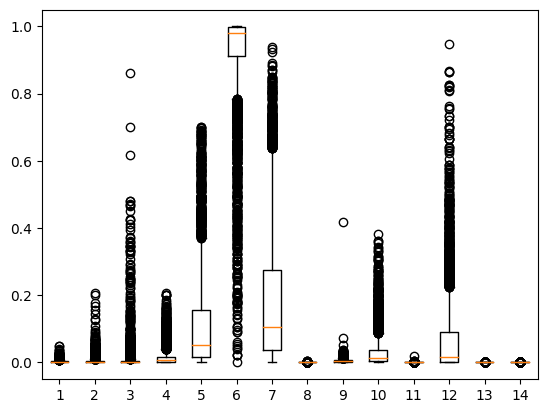

In [31]:
# boxplot ... data is normalized ... all columns are in same scale
plt.boxplot(normalizedX);

### Build regression models using at least three different regression algorithms, including Lasso. The Y value is imdb_score. 

#### Model #1(full model)

**Model Validation: Split validation**

In [32]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2606, 14) (2606,) (1118, 14) (1118,)


In [33]:
# let's double check 

print(len(dfnew))
print(len(dfnew) * 0.7)        # 70% of the original data
print(len(dfnew) * 0.3)        # 30% of the original data

3724
2606.7999999999997
1117.2


**Model Building**

In [34]:
# build full model using all variables
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)   
model1_y = model1.predict(X_test)# generate predicted y for model evaluation

In [35]:
# this is regression so it has coefficients and y-intercept

print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.43569909e-03  1.21359610e-02  7.99155762e-06  8.32043261e-05
  8.36822081e-05  3.50569730e-06 -8.25616035e-05 -3.32951447e-02
 -5.89642541e-04  8.37877759e-05 -1.09802864e-01 -2.15194931e-06
  2.52545599e-01 -2.52545599e-01]
y-intercept  5.305300160837498


In [36]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_)))).round(2)

,0,1
0,num_critic_for_reviews,0.00
1,duration,0.01
2,director_facebook_likes,0.00
3,actor_3_facebook_likes,0.00
4,actor_1_facebook_likes,0.00
5,num_voted_users,0.00
6,cast_total_facebook_likes,-0.00
7,facenumber_in_poster,-0.03
8,num_user_for_reviews,-0.00
9,actor_2_facebook_likes,0.00


**Model Evaluation**

In [37]:
print("mean square error: ", mean_squared_error(y_test, model1_y))
print("variance or r-squared: ", explained_variance_score(y_test, model1_y))

mean square error:  0.7047386578949038
variance or r-squared:  0.3585694812678353


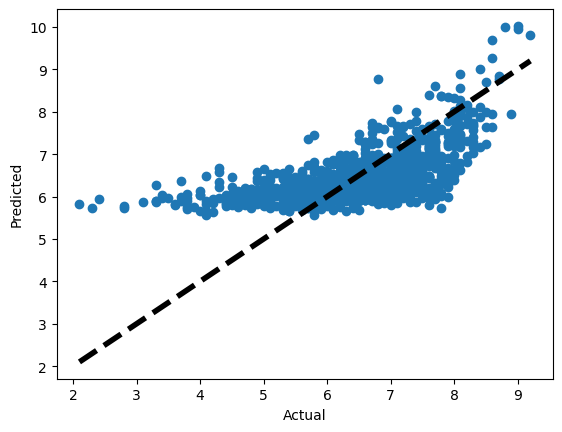

In [38]:
plt.subplots()
plt.scatter(y_test, model1_y)       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

* Model 1 doesn't seem to be very good.

#### Model #2(Lasso regression (Regularization))

In [39]:
#Fit the model
model2 = lm.Lasso(alpha=0.1)
model2.fit(X_train, y_train)   
model2_y = model2.predict(X_test)
           

In [40]:
print('Coefficients: ', model2.coef_)
print("y-intercept ", model2.intercept_)

Coefficients:  [ 1.33816352e-03  1.17578034e-02  1.08111820e-05  7.52177582e-05
  8.13089430e-05  3.48714826e-06 -8.04084877e-05 -8.24398328e-03
 -5.33530782e-04  8.12522405e-05 -0.00000000e+00 -2.21131060e-06
  0.00000000e+00 -0.00000000e+00]
y-intercept  4.847197411090045


In [41]:
pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_)))).round(2)

,0,1
0,num_critic_for_reviews,0.00
1,duration,0.01
2,director_facebook_likes,0.00
3,actor_3_facebook_likes,0.00
4,actor_1_facebook_likes,0.00
5,num_voted_users,0.00
6,cast_total_facebook_likes,-0.00
7,facenumber_in_poster,-0.01
8,num_user_for_reviews,-0.00
9,actor_2_facebook_likes,0.00


In [42]:
print("mean square error: ", mean_squared_error(y_test, model2_y))
print("variance or r-squared: ", explained_variance_score(y_test, model2_y))

mean square error:  0.7252891444939343
variance or r-squared:  0.3398899983208514


#### Model #3(f_Regression, k=2)

In [43]:
#selec only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[1.78000e+02, 8.86204e+05],
       [1.69000e+02, 4.71220e+05],
       [1.48000e+02, 2.75868e+05],
       ...,
       [7.70000e+01, 7.26390e+04],
       [8.10000e+01, 5.20550e+04],
       [9.00000e+01, 4.28500e+03]])

In [44]:
# what are those two columns?
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 5]


In [45]:
# show the selected X variables
X.columns[selector.get_support()]

Index(['duration', 'num_voted_users'], dtype='object')

f_regression determines that **duration** and **num_voted_users** are two most important predictors

In [46]:
# split validation (using X_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2606, 2) (2606,) (1118, 2) (1118,)


In [47]:
# Model Building

model3 = lm.LinearRegression()
model3.fit(X_train, y_train)
model3_y = model3.predict(X_test)

# Model Evaluation
print("mean square error: ", mean_squared_error(y_test, model3_y))
print("variance or r-squared: ", explained_variance_score(y_test, model3_y))

mean square error:  0.7830449512437508
variance or r-squared:  0.287430567797212


#### Model #4(f_Regression, k=3)

In [48]:
X_newer = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_newer

array([[7.23000e+02, 1.78000e+02, 8.86204e+05],
       [3.02000e+02, 1.69000e+02, 4.71220e+05],
       [6.02000e+02, 1.48000e+02, 2.75868e+05],
       ...,
       [1.43000e+02, 7.70000e+01, 7.26390e+04],
       [5.60000e+01, 8.10000e+01, 5.20550e+04],
       [4.30000e+01, 9.00000e+01, 4.28500e+03]])

In [49]:
# what are those three columns?

selector = SelectKBest(f_regression, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[0 1 5]


In [50]:
# show the selected X variables
X.columns[selector.get_support()]

Index(['num_critic_for_reviews', 'duration', 'num_voted_users'], dtype='object')

f_regression determines that **'num_critic_for_reviews', 'duration', 'num_voted_users'** are three most important predictors

In [51]:
# split validation (using X_new)
X_train, X_test, y_train, y_test = train_test_split(X_newer, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2606, 3) (2606,) (1118, 3) (1118,)


In [52]:
# Model Building
model4 = lm.LinearRegression()
model4.fit(X_train, y_train)
model4_y = model4.predict(X_test)

# Model Evaluation
print("mean square error: ", mean_squared_error(y_test, model4_y))
print("variance or r-squared: ", explained_variance_score(y_test, model4_y))

mean square error:  0.7777377932878229
variance or r-squared:  0.2922399187415148


#### Model #5(Recursive Feature Selection)

In [53]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip([x for x in rfe.ranking_], X.columns)))

Features sorted by their rank:
[(1, 'color_ Black and White'), (1, 'color_Color'), (2, 'aspect_ratio'), (3, 'facenumber_in_poster'), (4, 'duration'), (5, 'num_critic_for_reviews'), (6, 'num_user_for_reviews'), (7, 'actor_3_facebook_likes'), (8, 'actor_1_facebook_likes'), (9, 'actor_2_facebook_likes'), (10, 'cast_total_facebook_likes'), (11, 'director_facebook_likes'), (12, 'num_voted_users'), (13, 'movie_facebook_likes')]


RFE determines that **'color_ Black and White''color_Color'** are two most important predictors.

In [54]:
# Choose two variables as X (color_ Black and White and color_Color) and develop a multiple linear regression model (model4).
y = dfnew['imdb_score'] 
X = dfnew[['color_ Black and White','color_Color']]

In [55]:
# split validation (70% training & 30% testing data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2606, 2) (2606,) (1118, 2) (1118,)


In [56]:
# build a multiple regression model below

model5 = lm.LinearRegression()
model5.fit(X_train, y_train)   
model5_y = model5.predict(X_test)

In [57]:
print('Coefficients: ', model5.coef_)
print("y-intercept ", model5.intercept_)

Coefficients:  [ 0.33978936 -0.33978936]
y-intercept  6.774668471746677


In [58]:
pd.DataFrame(list(zip(X.columns, np.transpose(model5.coef_)))).round(2)

,0,1
0,color_ Black and White,0.34
1,color_Color,-0.34


In [59]:
# model evaluation
print("mean square error: ", mean_squared_error(y_test, model5_y))
print("variance or r-squared: ", explained_variance_score(y_test, model5_y))

mean square error:  1.0818933555458068
variance or r-squared:  0.015347622435486707


### Evaluate the models.

***We build 5 models:***

* MODEL 1(full model), with the mean square error **0.7047386578949048** and  the variance or r-squared is **0.35856948126783417**.

* MODEL 2:(Lasso regression),with the mean square error **0.7252891444939343** and the variance or r-squared is **0.3398899983208514**.

* MODEL 3:（f_Regression, k=2）, with the mean square error **0.7830449512437508** and the variance or r-squared is  **0.287430567797212**.

* MODEL 4:(f_Regression, k=3), with the mean square error **0.7777377932878307**, and the variance or r-squared is  **0.292239918741508**.

* MODEL 5:(Recursive Feature Selection), with the mean square error **3.6977823246083156e+23** and the variance or r-squared is   **-3.3647108281847255e+23**.

### What is your best model? What is the accuracy?

* The best model is **Lasso model** model with 2 variables(**duration** and **facenumber_in_poster**)
* According to the result above, the full model is with smallest MSE and higher r-square, However, it is accurate but too complex due to too many X variables.
* Then the No.2 would be Lasso model with 2 X variables(**duration** and **facenumber_in_poster**), they are accurate enough with an r-square of 0.34 and MSE 0.73, and simple and practical.

## Part III. Classification

### The goal is to build a classification model to predict if a movie is good or bad. You need to create a new “categorical” column from imdb_score in order to build classification models. Create the column by “converting” the imdb_score into 2 categories (or classes): “1~5 and 6~10, which represents bad (or 0) and good (or 1) respectively”
.

In [60]:
# convert imdb_score score to good or bad movie (1~5 bad, 6~10 good)
# https://stackoverflow.com/questions/43232753/how-to-change-the-values-of-a-column-based-on-two-conditions-in-python

dfnew['movie_grade'] = 0 # bad
dfnew.loc[df['imdb_score'] > 6,'movie_grade'] = 1 # good
dfnew.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color,movie_grade
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000,0,1,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0,0,1,1


### Exclude imdb_score in X variables since the column imdb_score is basically same as the newly created binary column.

In [61]:
# remove imdb_score column
df2=dfnew.drop('imdb_score', axis=1)
df2.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,color_ Black and White,color_Color,movie_grade
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,1.78,33000,0,1,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,2.35,0,0,1,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,2.35,85000,0,1,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,2.35,164000,0,1,1
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,2.35,24000,0,1,1


### Not all variables need to be used as X variables, but it is important to include all the relevant variables as X to increase the model accuracy.

In [62]:
#check data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3724 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3724 non-null   float64
 1   duration                   3724 non-null   float64
 2   director_facebook_likes    3724 non-null   float64
 3   actor_3_facebook_likes     3724 non-null   float64
 4   actor_1_facebook_likes     3724 non-null   float64
 5   gross                      3724 non-null   float64
 6   num_voted_users            3724 non-null   int64  
 7   cast_total_facebook_likes  3724 non-null   int64  
 8   facenumber_in_poster       3724 non-null   float64
 9   num_user_for_reviews       3724 non-null   float64
 10  budget                     3724 non-null   float64
 11  actor_2_facebook_likes     3724 non-null   float64
 12  aspect_ratio               3724 non-null   float64
 13  movie_facebook_likes       3724 non-null   int64

In [63]:
# remove irrelevant columns(duration,facenumber_in_poster,color_ Black and White,color_Color,budget )
df2 = df2.drop(['duration','facenumber_in_poster','color_ Black and White','color_Color','budget'], axis=1)
df2.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,movie_grade
0,723.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,936.0,1.78,33000,1
1,302.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,5000.0,2.35,0,1
2,602.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,393.0,2.35,85000,1
3,813.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,23000.0,2.35,164000,1
5,462.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,632.0,2.35,24000,1


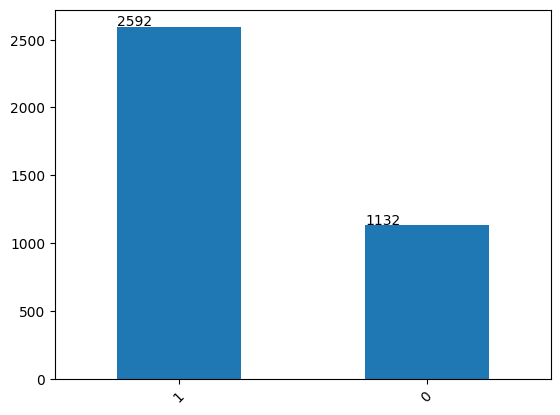

In [64]:
# caculate the number of good movies and bad movies
ax=df2['movie_grade'].value_counts().plot(kind='bar',rot=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

* As we can see from the chart above, good movies is **2592** and bad movies are **1132**.

### It is important that you use at least three different classification algorithms we have learned and evaluate model quality.


In [65]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classifiers（algorithm for classification）
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
#import randomforest classifier
from sklearn.ensemble import RandomForestClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

#### Model #1 KNN

##### Model Building & Validation

In [66]:
# declare X variables and y variable
y = df2['movie_grade'] 
X = df2.drop(['movie_grade'], axis =1)
X.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,723.0,0.0,855.0,1000.0,760505847.0,886204,4834,3054.0,936.0,1.78,33000
1,302.0,563.0,1000.0,40000.0,309404152.0,471220,48350,1238.0,5000.0,2.35,0
2,602.0,0.0,161.0,11000.0,200074175.0,275868,11700,994.0,393.0,2.35,85000
3,813.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,2701.0,23000.0,2.35,164000
5,462.0,475.0,530.0,640.0,73058679.0,212204,1873,738.0,632.0,2.35,24000


##### Search for the optimal k value (GridSearch)

In [67]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Initialize knn Classifier() ... name your decision model "knn"
knn=KNeighborsClassifier()

# Train a knn model
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [68]:
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}# frind the best k value from 1 to 25

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [69]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_score_)
print(knn_gs.best_params_)
print(knn_gs.best_estimator_)

0.6884152933130363
{'n_neighbors': 21}
KNeighborsClassifier(n_neighbors=21)


* From the above result, we can see that the **optimal k value should be 21 , so we set our n_neighbors to 21.**

In [70]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



# Initialize knn Classifier() ... name your decision model "knn"
knn=KNeighborsClassifier(n_neighbors=21)

# Train a knn model
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=21)

In [71]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html

print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.6851520572450805
--------------------------------------------------------
[[ 51 282]
 [ 70 715]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.42      0.15      0.22       333
           1       0.72      0.91      0.80       785

    accuracy                           0.69      1118
   macro avg       0.57      0.53      0.51      1118
weighted avg       0.63      0.69      0.63      1118

--------------------------------------------------------
0.5319905893154301


* The knn model is 68.5% accurate. Therefore, we expect that the model will be about **69% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.53**.

#### Model #2 Logistic regression using Recursive Feature Selection (RFE)

In [72]:
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

In [73]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)  #asking five best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print((rfe.support_))
print((rfe.ranking_))

[ True False False  True False False  True  True  True False False]
[1 3 2 1 7 5 1 1 1 4 6]


In [74]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,num_critic_for_reviews,1
1,director_facebook_likes,3
2,actor_3_facebook_likes,2
3,actor_1_facebook_likes,1
4,gross,7
5,num_voted_users,5
6,cast_total_facebook_likes,1
7,num_user_for_reviews,1
8,actor_2_facebook_likes,1
9,aspect_ratio,4


In [75]:
#select 5 most significant features only 
X_logistic = df2[['num_critic_for_reviews', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'num_user_for_reviews', 'actor_2_facebook_likes']]
print(X_logistic.head())

   num_critic_for_reviews  actor_1_facebook_likes  cast_total_facebook_likes  \
0                   723.0                  1000.0                       4834   
1                   302.0                 40000.0                      48350   
2                   602.0                 11000.0                      11700   
3                   813.0                 27000.0                     106759   
5                   462.0                   640.0                       1873   

   num_user_for_reviews  actor_2_facebook_likes  
0                3054.0                   936.0  
1                1238.0                  5000.0  
2                 994.0                   393.0  
3                2701.0                 23000.0  
5                 738.0                   632.0  


In [76]:
## develop logistic regression model with X_logistic (only 5 predictors or independent variables)
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500)#—_iter refers to iteration
lr.fit(X_train, y_train)

#Model evaluation
print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.7084078711985689
[[ 13 320]
 [  6 779]]
              precision    recall  f1-score   support

           0       0.68      0.04      0.07       333
           1       0.71      0.99      0.83       785

    accuracy                           0.71      1118
   macro avg       0.70      0.52      0.45      1118
weighted avg       0.70      0.71      0.60      1118

0.515697863468564


The Logistic regression model is **70.8%** accurate. Therefore, we expect that the model will be about **71%** accurate when the model is applied into a real-world situation.The roc_auc_scoreis **0.52**.

#### Model #3 Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7066189624329159

In [78]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))
print(metrics.roc_auc_score(y_test, clf.predict(X_test)))

0.7066189624329159
[[139 194]
 [134 651]]
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       333
           1       0.77      0.83      0.80       785

    accuracy                           0.71      1118
   macro avg       0.64      0.62      0.63      1118
weighted avg       0.69      0.71      0.70      1118

0.6233583902373712


* The random forest model is 75.6% accurate. Therefore, we expect that the model will be about **76% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.68**.

#### Model#4 Decision Trees Model by using SelectKbest

In [79]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print(X_new)

[[7.60505847e+08 8.86204000e+05 3.30000000e+04]
 [3.09404152e+08 4.71220000e+05 0.00000000e+00]
 [2.00074175e+08 2.75868000e+05 8.50000000e+04]
 ...
 [4.24760000e+05 7.26390000e+04 1.90000000e+04]
 [2.04092000e+06 5.20550000e+04 0.00000000e+00]
 [8.52220000e+04 4.28500000e+03 4.56000000e+02]]


In [80]:
# this will help you identify the column indexes (and names)
selector = SelectKBest(chi2, k=3).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[ 4  5 10]


In [81]:
#identify the column  names
X.columns[selector.get_support()]

Index(['gross', 'num_voted_users', 'movie_facebook_likes'], dtype='object')

In [82]:
# Build a decision tree model with those three features ... Split validation:train (70%) and test sets (30%)

# declare X variables and y variable
y = df2['movie_grade'] 
X_new = df2[['gross', 'num_voted_users','movie_facebook_likes']]
X.head()

# split validation
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train a decision tree model
dt.fit(X_train, y_train) 

dt_y = dt.predict(X_test)


#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

(2606, 3) (2606,) (1118, 3) (1118,)
0.740608228980322
--------------------------------------------------------
[[147 186]
 [104 681]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.44      0.50       333
           1       0.79      0.87      0.82       785

    accuracy                           0.74      1118
   macro avg       0.69      0.65      0.66      1118
weighted avg       0.73      0.74      0.73      1118

--------------------------------------------------------
0.6544786825041602


* The Decision tree model is 74.1% accurate. Therefore, we expect that the model will be about **74% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.65**.

#### Model#5 GradientBoostingClassifier

In [83]:
# import advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [84]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize 
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

# fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [85]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, gb.predict(X_test)))

0.7584973166368515
--------------------------------------------------------
[[152 181]
 [ 89 696]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.46      0.53       333
           1       0.79      0.89      0.84       785

    accuracy                           0.76      1118
   macro avg       0.71      0.67      0.68      1118
weighted avg       0.75      0.76      0.75      1118

--------------------------------------------------------
0.6715403301390562


* The GradientBoosting model is 75.8% accurate. Therefore, we expect that the model will be about **76% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.67**.

#### Model#6 Support Vector Machine (SVM)

In [86]:
# initialize 
svm = SVC(gamma='auto', probability=True)
# fit the model
svm.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [87]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svm.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, svm.predict(X_test)))

0.7039355992844365
--------------------------------------------------------
[[  2 331]
 [  0 785]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       333
           1       0.70      1.00      0.83       785

    accuracy                           0.70      1118
   macro avg       0.85      0.50      0.42      1118
weighted avg       0.79      0.70      0.58      1118

--------------------------------------------------------
0.503003003003003


* The Support Vector Machine model is 70.3% accurate. Therefore, we expect that the model will be about **70% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.50**.

#### Model#7 Neural Network

In [88]:
nn = MLPClassifier(solver='lbfgs', max_iter=500,random_state=0)
nn.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=0, solver='lbfgs')

In [89]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, nn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, nn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, nn.predict(X_test)))

0.7021466905187835
--------------------------------------------------------
[[  0 333]
 [  0 785]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       333
           1       0.70      1.00      0.83       785

    accuracy                           0.70      1118
   macro avg       0.35      0.50      0.41      1118
weighted avg       0.49      0.70      0.58      1118

--------------------------------------------------------
0.5


* The Neural Network model is 70.2% accurate. Therefore, we expect that the model will be about **70% accurate** when the model is applied into a real-world situation.The roc_auc_scoreis **0.5**.

### What is your best classification model? What is the model accuracy? True positive rate? False positive rate? What is ROC score?

* The best classification model is **Random Forest Model**.  
* The model accuracy is **76%**.
* True positive rate is **0.87**. 
* False positive rate is **0.5**
* The ROC score is **0.68**.

•	679: those good movies, the model correctly classify them as good movies;
•	163: those bad movies, the model incorrectly classify them as good movies,
•	170:those bad movies, the model correctly classify them as bad movies;
•	106: those good movies, the model incorrectly classify them as bad movies.


## Part IV. Clustering

### Analyze the data using K-means algorithm. Use the Elbow method to determine the optimal K value for Kmeans analysis. 

In [90]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [91]:
df3=dfnew.drop(['movie_grade','color_Color','color_ Black and White'], axis=1)
df3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000


In [92]:
# variance test
df3.var()

num_critic_for_reviews       1.521325e+04
duration                     5.141788e+02
director_facebook_likes      9.463226e+06
actor_3_facebook_likes       3.491657e+06
actor_1_facebook_likes       2.419972e+08
gross                        4.871899e+15
num_voted_users              2.296863e+10
cast_total_facebook_likes    3.652412e+08
facenumber_in_poster         4.181960e+00
num_user_for_reviews         1.689667e+05
budget                       5.149340e+16
actor_2_facebook_likes       2.052636e+07
imdb_score                   1.109902e+00
aspect_ratio                 1.252122e-01
movie_facebook_likes         4.590014e+08
dtype: float64

In [93]:
#Normalize data 

X = (df3 - df3.mean()) / (df3.max() - df3.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0.685560,0.231188,-0.035203,0.003916,-0.010534,0.931011,0.462029,-0.010139,-0.031992,0.537616,0.015618,-0.007836,0.186289,-0.022318,0.067917
1,0.166448,0.200472,-0.010724,0.010221,0.050404,0.337851,0.216428,0.056123,-0.031992,0.178439,0.020775,0.021828,0.082393,0.016144,-0.026639
2,0.536362,0.128799,-0.035203,-0.026258,0.005091,0.194091,0.100813,0.000316,-0.008737,0.130179,0.016273,-0.011800,0.043432,0.016144,0.216914
3,0.796534,0.183407,0.921319,0.966742,0.030091,0.520264,0.614800,0.145062,-0.031992,0.467798,0.016682,0.153215,0.264211,0.016144,0.443275
5,0.363735,0.074192,-0.014551,-0.010214,-0.011096,0.027077,0.063135,-0.014648,-0.008737,0.079546,0.017804,-0.010055,0.017458,0.016144,0.042129


In [94]:
# variance test again

X.var()

num_critic_for_reviews       0.023130
duration                     0.005989
director_facebook_likes      0.017889
actor_3_facebook_likes       0.006600
actor_1_facebook_likes       0.000591
gross                        0.008424
num_voted_users              0.008045
cast_total_facebook_likes    0.000847
facenumber_in_poster         0.002262
num_user_for_reviews         0.006610
budget                       0.000345
actor_2_facebook_likes       0.001094
imdb_score                   0.018720
aspect_ratio                 0.000570
movie_facebook_likes         0.003768
dtype: float64

* From the variance test result we can see that all the variables are in the same scale.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

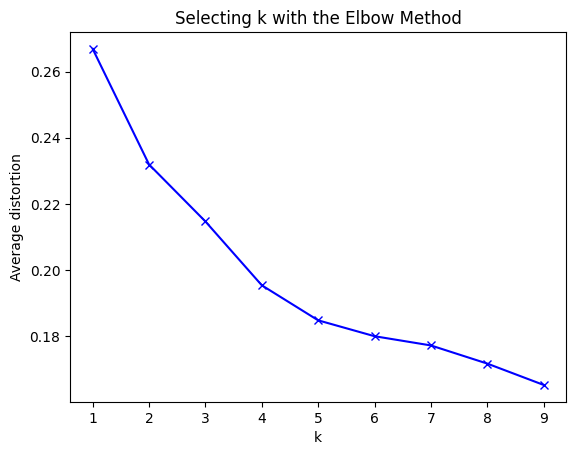

In [95]:
# determine an optimal value of k using "Elbow" method
from scipy.spatial.distance import cdist 

K = list(range(1, 10)) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method')

* From the chart above, we decide **k=4**.

#### Clustering analysis (k = 4): Include "random_state=0"

In [96]:
# clustering analysis using k-means
k_means=KMeans(init='k-means++',n_clusters=4,random_state=0)
k_means.fit(X)

KMeans(n_clusters=4, random_state=0)

In [97]:
# cluster labels

k_means.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [98]:
# find out cluster centers

k_means.cluster_centers_

array([[-9.46858606e-02, -3.90866139e-02, -3.04000994e-02,
        -1.02714561e-02, -3.85236761e-03, -3.06975719e-02,
        -4.55059841e-02, -5.46422808e-03,  4.70624666e-03,
        -3.44178480e-02, -1.26529609e-03, -6.08849997e-03,
        -1.55203439e-01, -3.67829888e-03, -2.22754008e-02],
       [-2.53310914e-02,  5.82856821e-03, -2.73358986e-02,
        -8.82924842e-03, -9.39119698e-04, -1.59842667e-02,
        -1.76932980e-02, -1.95497567e-03, -1.83418750e-03,
        -1.52790168e-02, -5.95649324e-04, -2.34003839e-03,
         5.12771907e-02,  2.21727575e-04, -1.31279136e-02],
       [ 2.46818854e-01,  4.21974842e-02, -2.28267777e-02,
         4.04542798e-02,  8.15241736e-03,  1.00959361e-01,
         1.21113443e-01,  1.34651727e-02, -3.67813642e-04,
         1.01208671e-01,  4.39385835e-03,  1.58653768e-02,
         1.00851840e-01,  5.95051168e-03,  7.93419520e-02],
       [ 9.97492802e-02,  5.32293838e-02,  6.06504174e-01,
         3.57117570e-02,  9.43162698e-03,  5.23468790

In [99]:
# convert cluster lables to dataframe

df4 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df4.head()

,cluster
0,2
1,2
2,2
3,3
4,2


In [100]:
# joining two dataframes

df3= df3.reset_index(drop=True)# reset_index after dealing with the original data
df4= df4.reset_index(drop=True)

df5 = df3.join(df4)
df5.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000,2
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0,2
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000,2
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000,3
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000,2


In [101]:
df5.tail()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster
3719,81.0,110.0,107.0,45.0,576.0,136007.0,3924,776,1.0,39.0,4500.0,133.0,6.9,2.35,171,1
3720,64.0,90.0,397.0,0.0,5.0,673780.0,4555,5,0.0,26.0,10000.0,0.0,7.5,1.85,697,1
3721,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,45.0,7.0,1.85,19000,1
3722,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,20.0,6.9,1.37,0,1
3723,43.0,90.0,16.0,16.0,86.0,85222.0,4285,163,0.0,84.0,1100.0,23.0,6.6,1.85,456,1


### This is exploratory data analysis, and you need to report the movie (or cluster) “profiles” based on clustering analysis.


In [102]:
#How many observations are there in each cluster 
df5.groupby(['cluster']).size()

cluster
0    1100
1    1909
2     553
3     162
dtype: int64

* In cluster 0 there are **1909** observations, in cluster 1 there are **162** observations, in cluster 2 there are **1100** observations,in cluster 3 there are **553** observations.

In [103]:
#The mean values of each cluster in terms of different variables
df5.groupby(['cluster']).mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
cluster,,,,,,,,,,,,,,,
0,90.254545,98.789091,110.334545,529.483636,5275.138182,2.912313e+07,28652.123636,7906.660909,1.572727,161.903636,3.077767e+07,1176.704545,5.268727,2.055700,1525.654545
1,146.388685,111.967522,180.936616,561.356731,7139.026192,4.029749e+07,75572.666317,10204.699319,1.300157,258.399686,3.892677e+07,1687.684128,6.859770,2.114280,4710.418544
2,367.180832,122.625678,284.647378,1695.374322,12959.065099,1.292468e+08,310168.884268,20335.515371,1.359855,847.524412,9.989286e+07,4183.103074,7.242134,2.198933,36987.341772
3,247.907407,125.858025,14759.259259,1586.296296,13777.759259,9.227670e+07,281930.506173,20830.574074,0.981481,682.154321,5.379449e+07,4037.845679,7.296296,2.141852,21590.253086


In [104]:
df5.groupby(['cluster']).mean().T

cluster,0,1,2,3
num_critic_for_reviews,9.025455e+01,1.463887e+02,3.671808e+02,2.479074e+02
duration,9.878909e+01,1.119675e+02,1.226257e+02,1.258580e+02
director_facebook_likes,1.103345e+02,1.809366e+02,2.846474e+02,1.475926e+04
actor_3_facebook_likes,5.294836e+02,5.613567e+02,1.695374e+03,1.586296e+03
actor_1_facebook_likes,5.275138e+03,7.139026e+03,1.295907e+04,1.377776e+04
gross,2.912313e+07,4.029749e+07,1.292468e+08,9.227670e+07
num_voted_users,2.865212e+04,7.557267e+04,3.101689e+05,2.819305e+05
cast_total_facebook_likes,7.906661e+03,1.020470e+04,2.033552e+04,2.083057e+04
facenumber_in_poster,1.572727e+00,1.300157e+00,1.359855e+00,9.814815e-01
num_user_for_reviews,1.619036e+02,2.583997e+02,8.475244e+02,6.821543e+02


## profiling 
1. cluster 0: 
* relatively low **num_critic_for_reviews**, 
* relatively low **duration**,
* relatively low **director_facebook_likes**,
* relatively low **actor_3_facebook_likes**,
* relatively low **actor_1_facebook_likes**,
* relatively low **gross**,
* relatively low **num_voted_users**	,
* relatively low **cast_total_facebook_likes**, 
* relatively low **facenumber_in_poster**,
* relatively low **num_user_for_reviews**,
* relatively low **budget**,
* relatively low **actor_2_facebook_likes**,
* relatively low **imdb_score**,
* relatively low **aspect_ratio**,
* relatively low **movie_facebook_likes**


2. cluster 1: 
* relatively high **num_critic_for_reviews**, 
* high **duration**,
* high **director_facebook_likes**,
* relatively high **actor_3_facebook_likes**,
* high **actor_1_facebook_likes**,
* relatively high **gross**,
* relatively high **num_voted_users**,
* high **cast_total_facebook_likes**,
* low **facenumber_in_poster**,
* relatively high **num_user_for_reviews**,
* relatively high **budget**,
* relatively high **actor_2_facebook_likes**,
* high **imdb_score**,
* relatively high **aspect_ratio**,
* relatively high **movie_facebook_likes**.


3. cluster 2: 
* low **num_critic_for_reviews**,
* low **duration**, 
* low **director_facebook_likes**,
* low  **actor_3_facebook_likes**,
* low **actor_1_facebook_likes**,
* low **gross**, 
* low **num_voted_users**, 
* low **cast_total_facebook_likes**,
* high **facenumber_in_poster**, 
* low **num_user_for_reviews**,
* low **budget**, 
* low **actor_2_facebook_likes**,
* low **imdb_score**,
* low **aspect_ratio**, 
* low **movie_facebook_likes**.


3. cluster 3: 
* high **num_critic_for_reviews**,
* relatively high **duration**, 
* relatively high **director_facebook_likes**,
* high  **actor_3_facebook_likes**,
* relatively high **actor_1_facebook_likes**,
* high **gross**, 
* high **num_voted_users**, 
* relatively high **cast_total_facebook_likes**,
* relatively high **facenumber_in_poster**,
* high **num_user_for_reviews**,
* high **budget**, 
* high **actor_2_facebook_likes**,
* relatively high **imdb_score**,
* high **aspect_ratio**, 
* high **movie_facebook_likes**.

## Part V. Storytelling

### At the end, this is what your client is interested in. Develop useful insights from your correlation analysis and machine learning models (regression, classification, and clustering). Write a summery using bulleted lists and/or numbers in markdown cells. If this section is “too thin”, your project will receive a low grade.

* imdb_score has high positive correlation with num_voted_users, duration,num_critic_for_reviews and num_user_for_reviews, which means high num_voted_users,high duration,high num_critic_for_reviews and high num_user_for_reviews, high imdb_score.
* imdb_score has negative correlation with facenumber_in_poster and Color_color,which means _low facenumber_in_poster high imdb_score._
* High cast_total_facebook_likes, high imdb_score.
* High director_facebook_likes, high imdb_score.
* High actor_3_facebook_likes, , high imdb_score.
* High actor_1_facebook_likes, high imdb_score.
* High actor_2_facebook_likes, high imdb_score.
* High budget, high imdb_score.
* Our best **regression model** indicates that **duration and facenumber_in_poster** play a very important role in the imdb_score. With the increase of the duration, the imdb_score also increases, and with the increase of facenumber_in_poster, the imdb_score decreases. 
* After building, validating and evaluating multiple **classification models**, we can see that num_critic_for_reviews, director_facebook_likes , actor_3_facebook_likes, actor_1_facebook_likes , gross, num_voted_users, cast_total_facebook_likes , num_user_for_reviews, actor_2_facebook_likes, aspect_ratio, movie_facebook_likes are important variables in predicting whether the movie is good or bad. Using the 11 features, our test result using **random forest** in predicting whether people leave or not is **76% accurate**.
* We use K-means algorithm build a **clustering model** and divide the whole dataset into 4 clusters. In cluster 0 there are 1909 observations, in cluster 1 there are 162 observations, in cluster 2 there are 1100 observations, in cluster 3 there are 553 observations.In Cluster 0, the 11 features(num_critic_for_reviews, duration, director_facebook_likes, actor_3_facebook_likes, actor_1_facebook_likes, gross, num_voted_users, cast_total_facebook_likes, facenumber_in_poster, num_user_for_reviews,  budget, actor_2_facebook_likes,  imdb_score, aspect_ratio,  movie_facebook_likes) are all relatively low. In Cluster 2, all features except  facenumber_in_poster are low. Cluster 1 has the highest imdb_score, its features are either high or relatively high, except facenumber_in_poster, which is the lowest. Cluster 3 has the highest gross, its features are either high or relatively high. 
* From the data, we can say that a good movie don’t need too many faces in a poster.

